# Regresja

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import cross_val_predict
from sklearn import linear_model
import matplotlib.pyplot as plt

Rozważmy zbiór Boston

In [2]:
boston = datasets.load_boston()
# print description
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [3]:
# get the data
boston_X = boston.data
boston_Y = boston.target

Podzielmy zbiór na część testową i treningową .

In [4]:
# Split the data into training/testing sets
boston_X_train = boston_X[:-50]
boston_X_test = boston_X[-50:]
 
# Split the targets into training/testing sets
boston_y_train = boston_Y[:-50]
boston_y_test = boston_Y[-50:]

In [5]:
X=boston_X_train
y=boston_y_train

# Zadanie
Znajdż najleprzy model dzieląc na zbiór testowy i terningowy.


In [6]:
from sklearn.model_selection import GridSearchCV
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.pipeline import make_pipeline
from sklearn import model_selection

seed=123
kfold = model_selection.KFold(n_splits=5, random_state=seed)


In [28]:
grid_1 = GridSearchCV(make_pipeline(PolynomialFeatures(degree=2), ElasticNet(alpha=1)),
                    param_grid={'polynomialfeatures__degree': [1, 2, 3, 4],
                    'elasticnet__alpha': [0.01, 0.1, 1, 10]},
                    cv=kfold,
                    refit=True)
grid_1.fit(X, y)
grid_1.best_params_

C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increa

C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increa

{'elasticnet__alpha': 1, 'polynomialfeatures__degree': 1}

In [29]:
grid_1.cv_results_['mean_test_score'].reshape(4, -1)

array([[ 1.58100523e-01, -1.81557121e+02, -1.25548241e+03,
        -2.93955525e+04],
       [ 4.15342827e-01, -9.48480026e-01, -5.55987741e+02,
        -3.23053009e+05],
       [ 4.70898357e-01,  1.10322554e-01, -8.85392282e+01,
        -8.76799455e+03],
       [ 2.14286414e-01,  1.89988997e-01, -9.81903428e-01,
        -1.08753157e+03]])

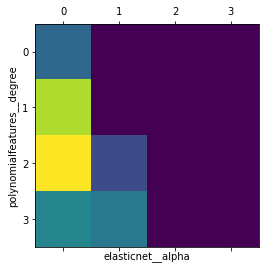

In [30]:
plt.matshow(grid_1.cv_results_['mean_test_score'].reshape(4, -1),
vmin=0, cmap="viridis")
plt.xlabel("elasticnet__alpha")
plt.ylabel("polynomialfeatures__degree")
plt.show()

In [8]:
grid_2 = GridSearchCV(make_pipeline(PolynomialFeatures(degree=2), Lasso(alpha=1, tol=0.1)),
                    param_grid={'polynomialfeatures__degree': [1, 2, 3, 4],
                    'lasso__alpha': [0.1, 1, 2, 3]},
                    cv=5,
                    refit=True)
grid_2.fit(X, y)
grid_2.best_params_

{'lasso__alpha': 0.1, 'polynomialfeatures__degree': 1}

In [9]:
grid_3 = GridSearchCV(make_pipeline(PolynomialFeatures(degree=2), linear_model.Ridge(alpha=1, tol=0.1)),
                    param_grid={'polynomialfeatures__degree': [1, 2, 3, 4],
                    'ridge__alpha': [0.1, 1, 2, 3]},
                    cv=5,
                    refit=True)
grid_3.fit(X, y)
grid_3.best_params_

C:\Users\admin\Anaconda3\lib\site-packages\scipy\linalg\basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 8.966219240689948e-22
  ' condition number: {}'.format(rcond), RuntimeWarning)
C:\Users\admin\Anaconda3\lib\site-packages\scipy\linalg\basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 1.0416200068852991e-20
  ' condition number: {}'.format(rcond), RuntimeWarning)
C:\Users\admin\Anaconda3\lib\site-packages\scipy\linalg\basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 7.5089865252423e-21
  ' condition number: {}'.format(rcond), RuntimeWarning)
C:\Users\admin\Anaconda3\lib\site-packages\scipy\linalg\basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Re

C:\Users\admin\Anaconda3\lib\site-packages\scipy\linalg\basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 4.525115279237473e-19
  ' condition number: {}'.format(rcond), RuntimeWarning)
C:\Users\admin\Anaconda3\lib\site-packages\scipy\linalg\basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 4.621150426257029e-20
  ' condition number: {}'.format(rcond), RuntimeWarning)
C:\Users\admin\Anaconda3\lib\site-packages\scipy\linalg\basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 5.800296697108958e-21
  ' condition number: {}'.format(rcond), RuntimeWarning)
C:\Users\admin\Anaconda3\lib\site-packages\scipy\linalg\basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. R

{'polynomialfeatures__degree': 1, 'ridge__alpha': 3}

In [10]:
grid_4 = GridSearchCV(make_pipeline(PolynomialFeatures(degree=2), linear_model.LinearRegression()),
                    param_grid={'polynomialfeatures__degree': [1, 2, 3, 4]},
                    cv=kfold,
                    refit=True)
grid_4.fit(X, y)
print(grid_4.best_params_)
grid_4.best_estimator_

{'polynomialfeatures__degree': 1}


Pipeline(memory=None,
     steps=[('polynomialfeatures', PolynomialFeatures(degree=1, include_bias=True, interaction_only=False)), ('linearregression', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))])

In [16]:
from sklearn.svm import SVR
grid_5 = GridSearchCV(SVR(kernel='rbf', gamma=0.1),
                    param_grid={"C": [300, 400, 500, 1000, 1500, 2000], 
                                "gamma": [0.0000001, 0.000001, 0.00001, 0.0001]},
                    cv=kfold,
                    refit=True)
grid_5.fit(X, y)
print(grid_5.best_params_)
grid_5.best_estimator_

{'C': 1000, 'gamma': 1e-05}


SVR(C=1000, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=1e-05,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [46]:
from sklearn.ensemble import RandomForestRegressor
param_grid = {
    'n_estimators': [70, 200, 700, 800],
    'max_depth':  [100, 170, 200],
    'max_features': ['log2'],
    
}
rfc = RandomForestRegressor(n_jobs=-1,max_features= 'sqrt' ,n_estimators=50, oob_score = True) 
grid_6 = GridSearchCV(estimator=rfc, 
                      param_grid=param_grid, 
                      cv= kfold)
grid_6.fit(X, y)
print(grid_6.best_params_)
grid_6.best_estimator_

{'max_depth': 170, 'max_features': 'log2', 'n_estimators': 700}


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=170,
           max_features='log2', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=700, n_jobs=-1,
           oob_score=True, random_state=None, verbose=0, warm_start=False)

In [ ]:
from sklearn.neural_network import MLPRegressor
grid_7 = GridSearchCV(MLPRegressor(hidden_layer_sizes=(100,100,100),activation='tanh',alpha=0.0001, max_iter=5000),#model powinien byc zainicjalizowany
                    param_grid={'hidden_layer_sizes': [(100,100,100,100,10)],
                                'alpha': [10, 100, 1000, 10000],
                               'activation': ['logistic', 'relu']                               
                               },#parametry do podstawienia
                    cv=kfold,#na ile czesci ma dzielic zbior
                    n_jobs=-1,
                    refit=True)
grid_7.fit(X, y)
print(grid_7.best_params_)
grid_7.best_estimator_

In [ ]:
from sklearn import  metrics

X_test=boston_X_test
y_test=boston_y_test

models = []
models.append(('ElasticNet', grid_1.best_estimator_))
models.append(('Lasso', grid_2.best_estimator_))
models.append(('Ridge', grid_3.best_estimator_))
models.append(('LR', grid_4.best_estimator_))
models.append(('SVR', grid_5.best_estimator_))
models.append(('RF', grid_6.best_estimator_))
models.append(('MLP_R', grid_7.best_estimator_))

r2 = []
explained_variance_score = []
median_absolute_error = []
mean_squared_error = []
mean_absolute_error = []
for name, model in models:
    print(name)
    print("R^2: {}".format(metrics.r2_score(y_test, model.predict(X_test)) ))
    print("Explained variance score: {}".format( metrics.explained_variance_score(y_test, model.predict(X_test)) ))
    print("Median absolute error: {}".format( metrics.median_absolute_error(y_test, model.predict(X_test)) ))
    print("Mean squared error: {}".format( metrics.mean_squared_error(y_test, model.predict(X_test)) ))
    print("Mean absolute errors: {}".format(metrics.mean_absolute_error(y_test, model.predict(X_test)) ))
    r2.append(metrics.r2_score(y_test, model.predict(X_test)))
    explained_variance_score.append(metrics.explained_variance_score(y_test, model.predict(X_test)))
    median_absolute_error.append( metrics.median_absolute_error(y_test, model.predict(X_test)))
    mean_squared_error.append(metrics.mean_squared_error(y_test, model.predict(X_test)))
    mean_absolute_error.append(metrics.mean_absolute_error(y_test, model.predict(X_test)))

In [ ]:
import pandas as pd
d = {'r2': r2, 
     'explained_variance_score': explained_variance_score, 
     'median_absolute_error': median_absolute_error,
     'mean_squared_error' : mean_squared_error,
     'mean_absolute_error' : mean_absolute_error,
    }
df = pd.DataFrame(data=d)
df.insert(loc=0, column='Method', value=['ElasticNet','Lasso','Ridge','LR','SVR','RF','MLP_R'])
df